## load data

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [5]:
df = pd.read_csv("Microsoft_Stock.csv", parse_dates = ["Date"], index_col = "Date")

In [8]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


## data wrangling

In [11]:
#set time series index
df.index = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Volume
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438


In [12]:
df.shape

(1511, 5)

In [13]:
#Check missing values
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

What is the trend of stock price?

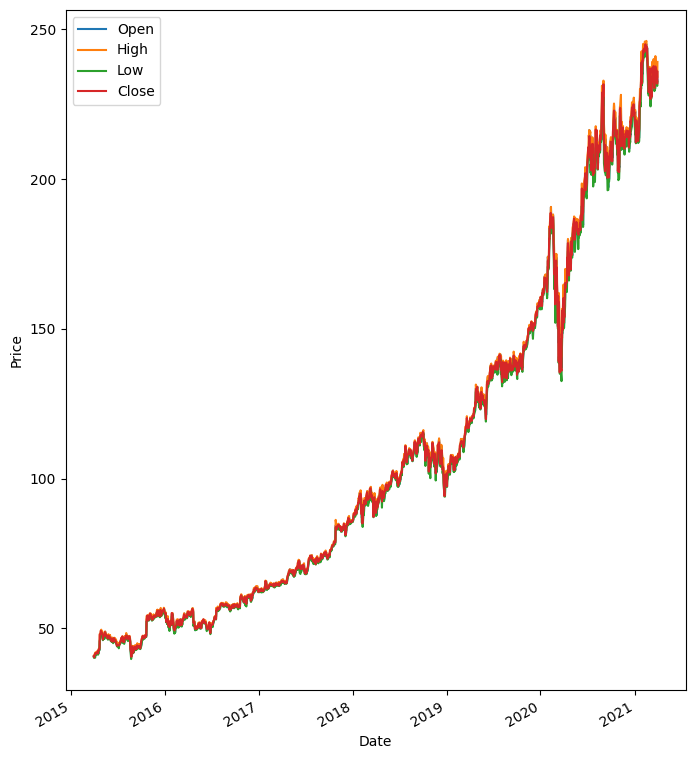

In [22]:
df[["Open","High","Low","Close"]].plot(figsize=(8,10),sharex = True, xlabel="Date", ylabel = "Price")
plt.show()

the four diffent type of prices has the same trend: over time, it increase from 50 in 2015 to near 150 in 2021. from now on, only need to select one price "Close" to further explore the data.

how about the volume distribution

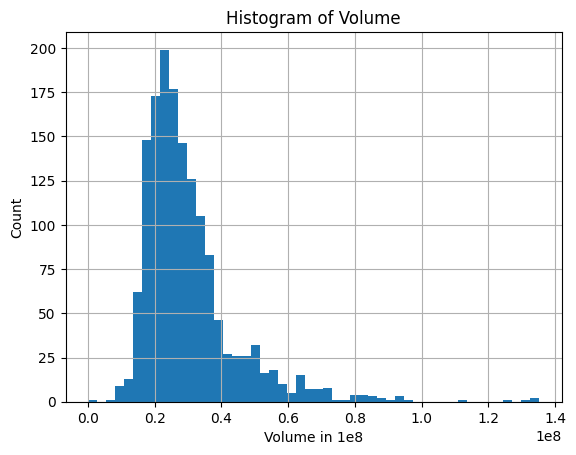

In [30]:
df["Volume"].hist(bins = 50)
plt.xlabel("Volume in 1e8")
plt.ylabel("Count")
plt.title("Histogram of Volume")
plt.show()

In [ ]:
How about the statistic of the data?

In [31]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


<Axes: >

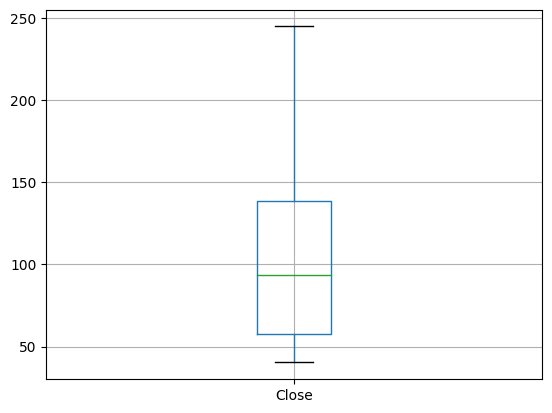

In [81]:
df[["Close"]].boxplot()

What's the daily, monthly and annual return?

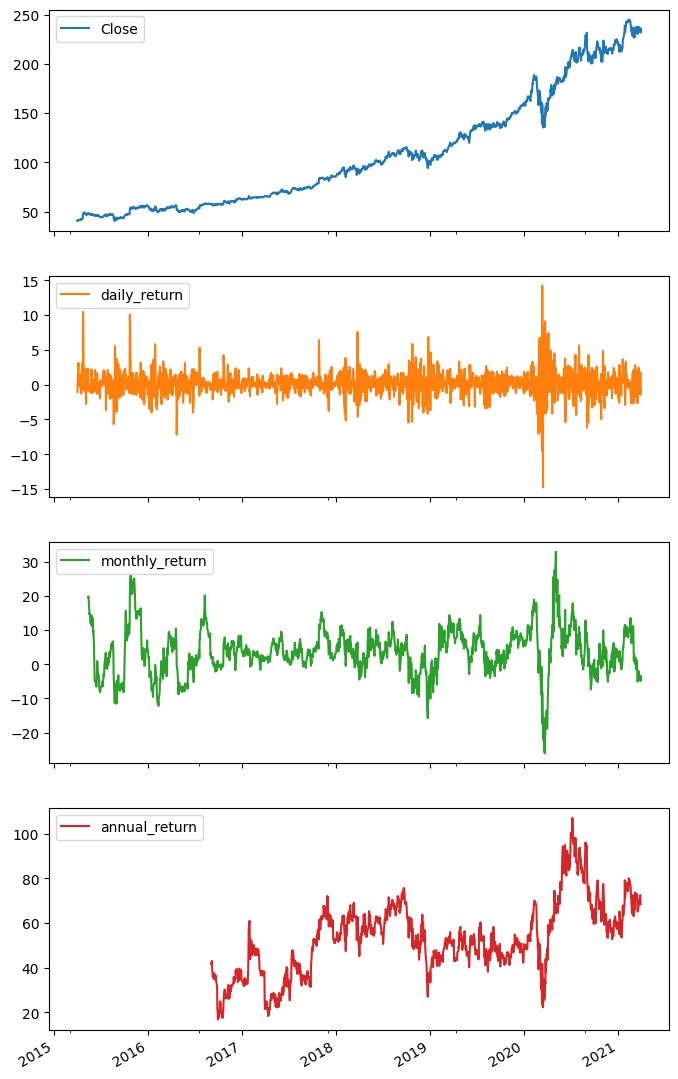

In [39]:
# Create daily_return
df['daily_return']= df.Close.pct_change(periods =1).mul(100)

# Create monthly_return
df['monthly_return'] = df.Close.pct_change(periods = 30).mul(100)

# Create annual_return
df['annual_return'] = df.Close.pct_change(periods = 360).mul(100)

# Plot the result
df[["Close","daily_return","monthly_return","annual_return"]].plot(subplots=True,figsize = (8,15),sharex = True)

plt.show()

In [74]:

# # Calculate and plot the weekly average trend
# df["Close"].resample('W').mean().plot();
# plt.show()

# # Calculate and plot the monthly average trend
# df["Close"].resample('M').mean().plot();
# plt.show();

# # Calculate and plot the annual average trend
# df["Close"].resample('A').mean().plot();
# plt.show();


In [75]:
# daily_returns = pd.Series(df["Close"].squeeze().pct_change())

# # Resample and calculate statistics
# stats = daily_returns.resample("A").agg(["mean","median","std"])

# # Plot stats here
# stats.plot()
# plt.show()

In [76]:
# # Define your investment
# investment = 1000

# # Calculate the daily returns here
# returns = df["Close"].pct_change()

# # Calculate the cumulative returns here
# returns_plus_one = returns+1
# cumulative_return = returns_plus_one.cumprod()

# # Calculate and plot the investment return here 
# cumulative_return.mul(investment).plot()
# plt.show()


In [77]:
# # Define a multi_period_return function
# def multi_period_return(period_returns):
#     return np.prod(period_returns+1)-1
    
# # Calculate daily returns
# daily_returns = df["Close"].pct_change()

# # Calculate rolling_annual_returns
# rolling_annual_returns = daily_returns.rolling("360D").apply(multi_period_return)

# # Plot rolling_annual_returns

# rolling_annual_returns.mul(100).plot()
# plt.show()

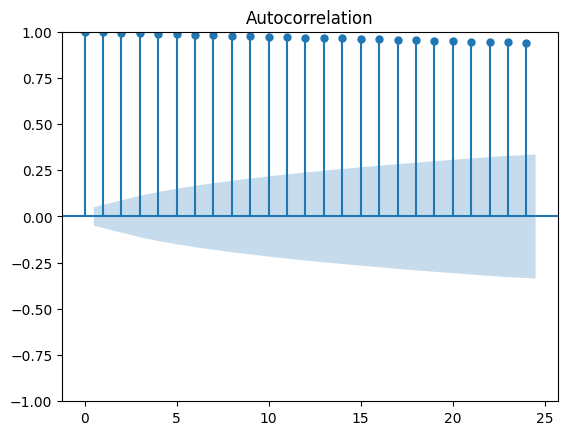

In [47]:
fig = tsaplots.plot_acf(df["Close"], lags=24)

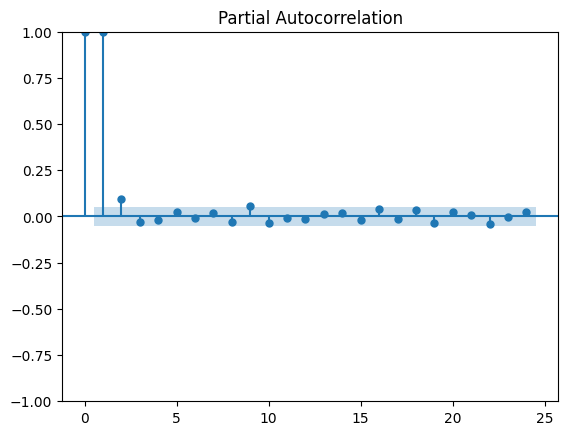

In [48]:
fig = tsaplots.plot_pacf(df["Close"], lags=24)

Auto correlation and partial autocorrelation plots for predicting p,d,q values for ARIMA algorithm

In [73]:
# pd.plotting.autocorrelation_plot(df['Close'])
# tsaplots.plot_pacf(df['Close'])
# plt.show()

## check whether the data is stationary

In [63]:
#are stock price is a random walk?

results= adfuller(df["Close"])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(1.7371362899270923, 0.9982158366942122, 24, 1486, {'1%': -3.4347582315402434, '5%': -2.863486949792871, '10%': -2.567806534528638}, 6604.225695235948)
The p-value of the test on prices is: 0.9982158366942122


The p is 0.998, which can't reject null hypothesis, the dataset is not stationary.

making the time series to stationary before modeling

(-10.038331065146433, 1.5195939917528986e-17, 24, 1485, {'1%': -3.43476120520139, '5%': -2.863488262178673, '10%': -2.567807233388883}, 6597.0173474503645)


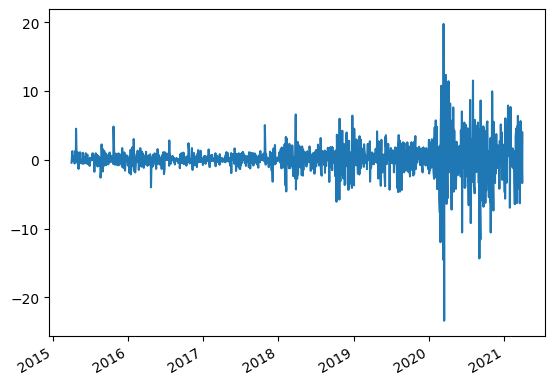

In [68]:
df_stationary = df["Close"].diff().dropna()
results_2 = adfuller(df_stationary)
print (results_2)

df_stationary.plot()
plt.show()

In [66]:
# df_ret = df["Close"].pct_change()

# # Eliminate the NaN in the first row of returns
# df_ret = df_ret.dropna()

# # Run the ADF test on the return series and print out the p-value
# results = adfuller(df_ret)
# print('The p-value of the test on returns is: ' + str(results[1]))

the data is stationary and can go to model.

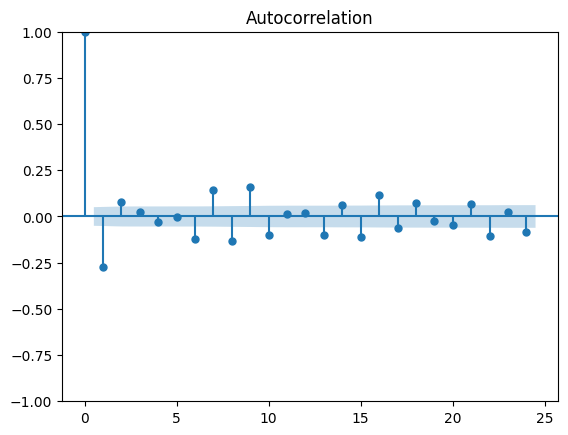

In [70]:
fig = tsaplots.plot_acf(df_stationary, lags=24)

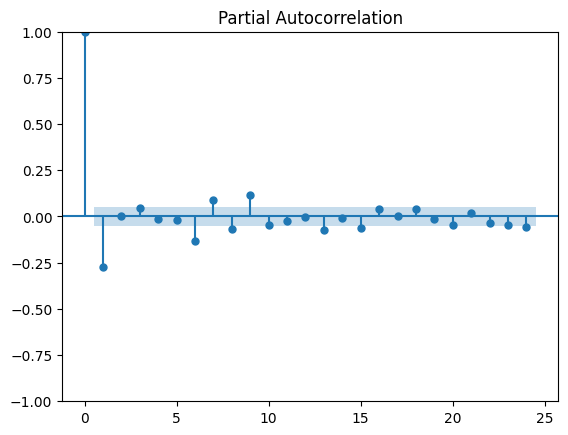

In [69]:
fig = tsaplots.plot_pacf(df_stationary, lags=24)